#### Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

#### Загрузка данных.  Основные характеристики датасета

In [3]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
print(df.shape)

(18249, 14)


In [5]:
print(df.columns)

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None


In [ ]:
bills_grouping_by_users = df.groupby('region')['AveragePrice'].sum()
bgu_desc = bills_grouping_by_users.describe()
print('В среднем авокадо стоил в каждом регионе стоило {}'.format(np.round(bgu_desc['mean'], 2)))
print('Самый дорогой авокадо стоил в регионе стоил{}, что составило на {}% больше от общей суммы'.format(
    int(bgu_desc['max']), np.round(100 * bgu_desc['max'] / bills_grouping_by_users.sum(), 2)))

In [ ]:
for index, bill in enumerate(bills_users_cumsum):
    bills_percent = 100 * bill / bills_grouping_by_users.sum()
    if bills_percent > 80:
        users_percent = 100 * index / bills_grouping_by_users.shape[0]
        print('{}% прибыли нам приносят {}% покупателей'.format(
            int(np.round(bills_percent)), np.round(users_percent, 2)))
        break

#### Визуальное исследование датасета

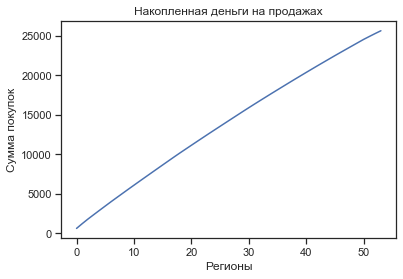

In [40]:
bills_apps_cumsum = bills_grouping_by_users.sort_values(ascending=False).cumsum()
plt.plot(range(bills_grouping_by_users.shape[0]), bills_apps_cumsum)
plt.title('Накопленная деньги на продажах')
plt.xlabel('Регионы')
plt.ylabel('Сумма покупок');

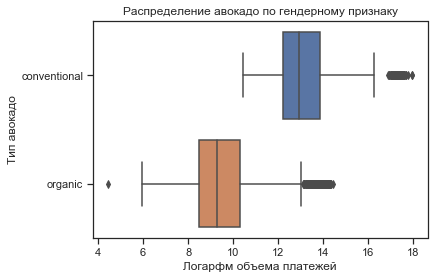

In [39]:
sns.boxplot(y=df["type"], x=np.log(df["Total Volume"]), orient="h")
plt.title('Распределение авокадо по гендерному признаку')
plt.xlabel('Логарфм объема платежей')
plt.ylabel('Тип авокадо');

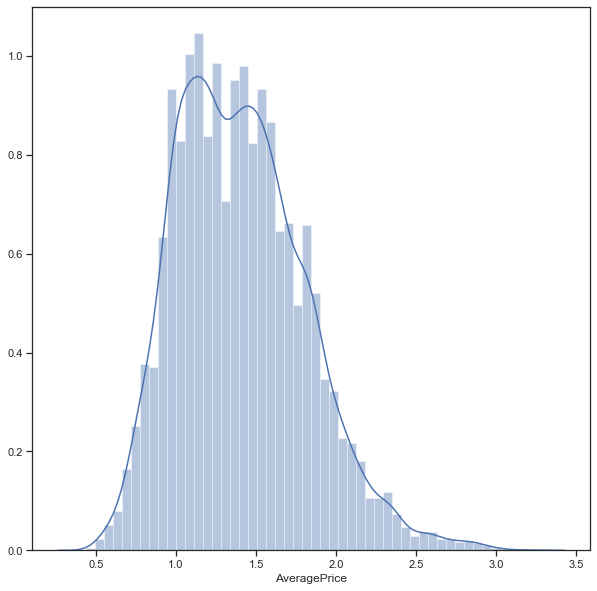

In [46]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(df['AveragePrice'])

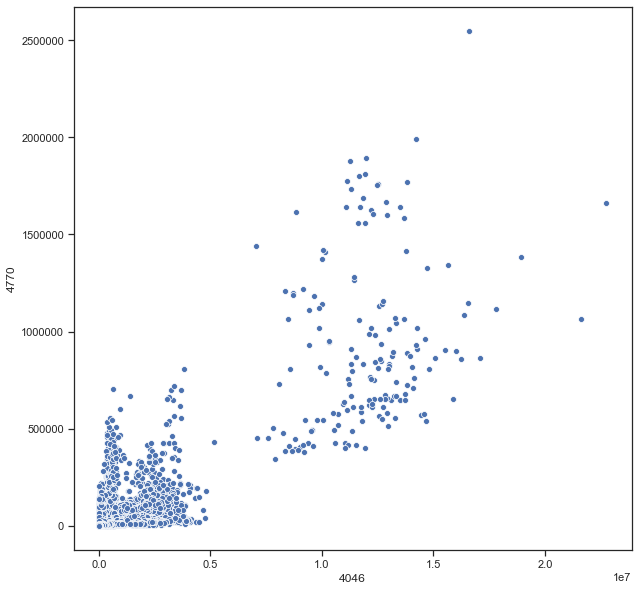

In [5]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='4046', y='4770', data=df)

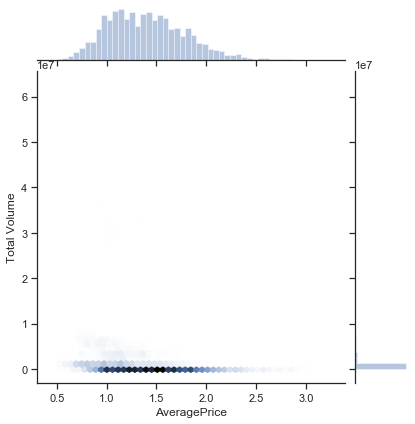

In [10]:
sns.jointplot(x='AveragePrice', y='Total Volume', data=df, kind="hex")

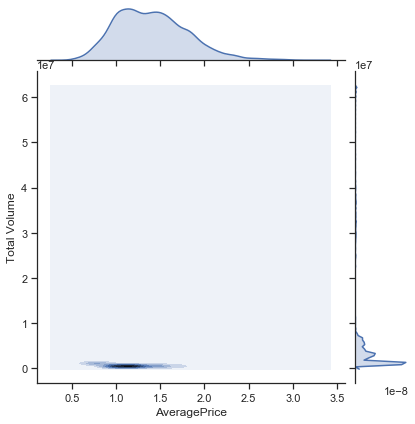

In [4]:
sns.jointplot(x='AveragePrice', y='Total Volume', data=df, kind="kde")

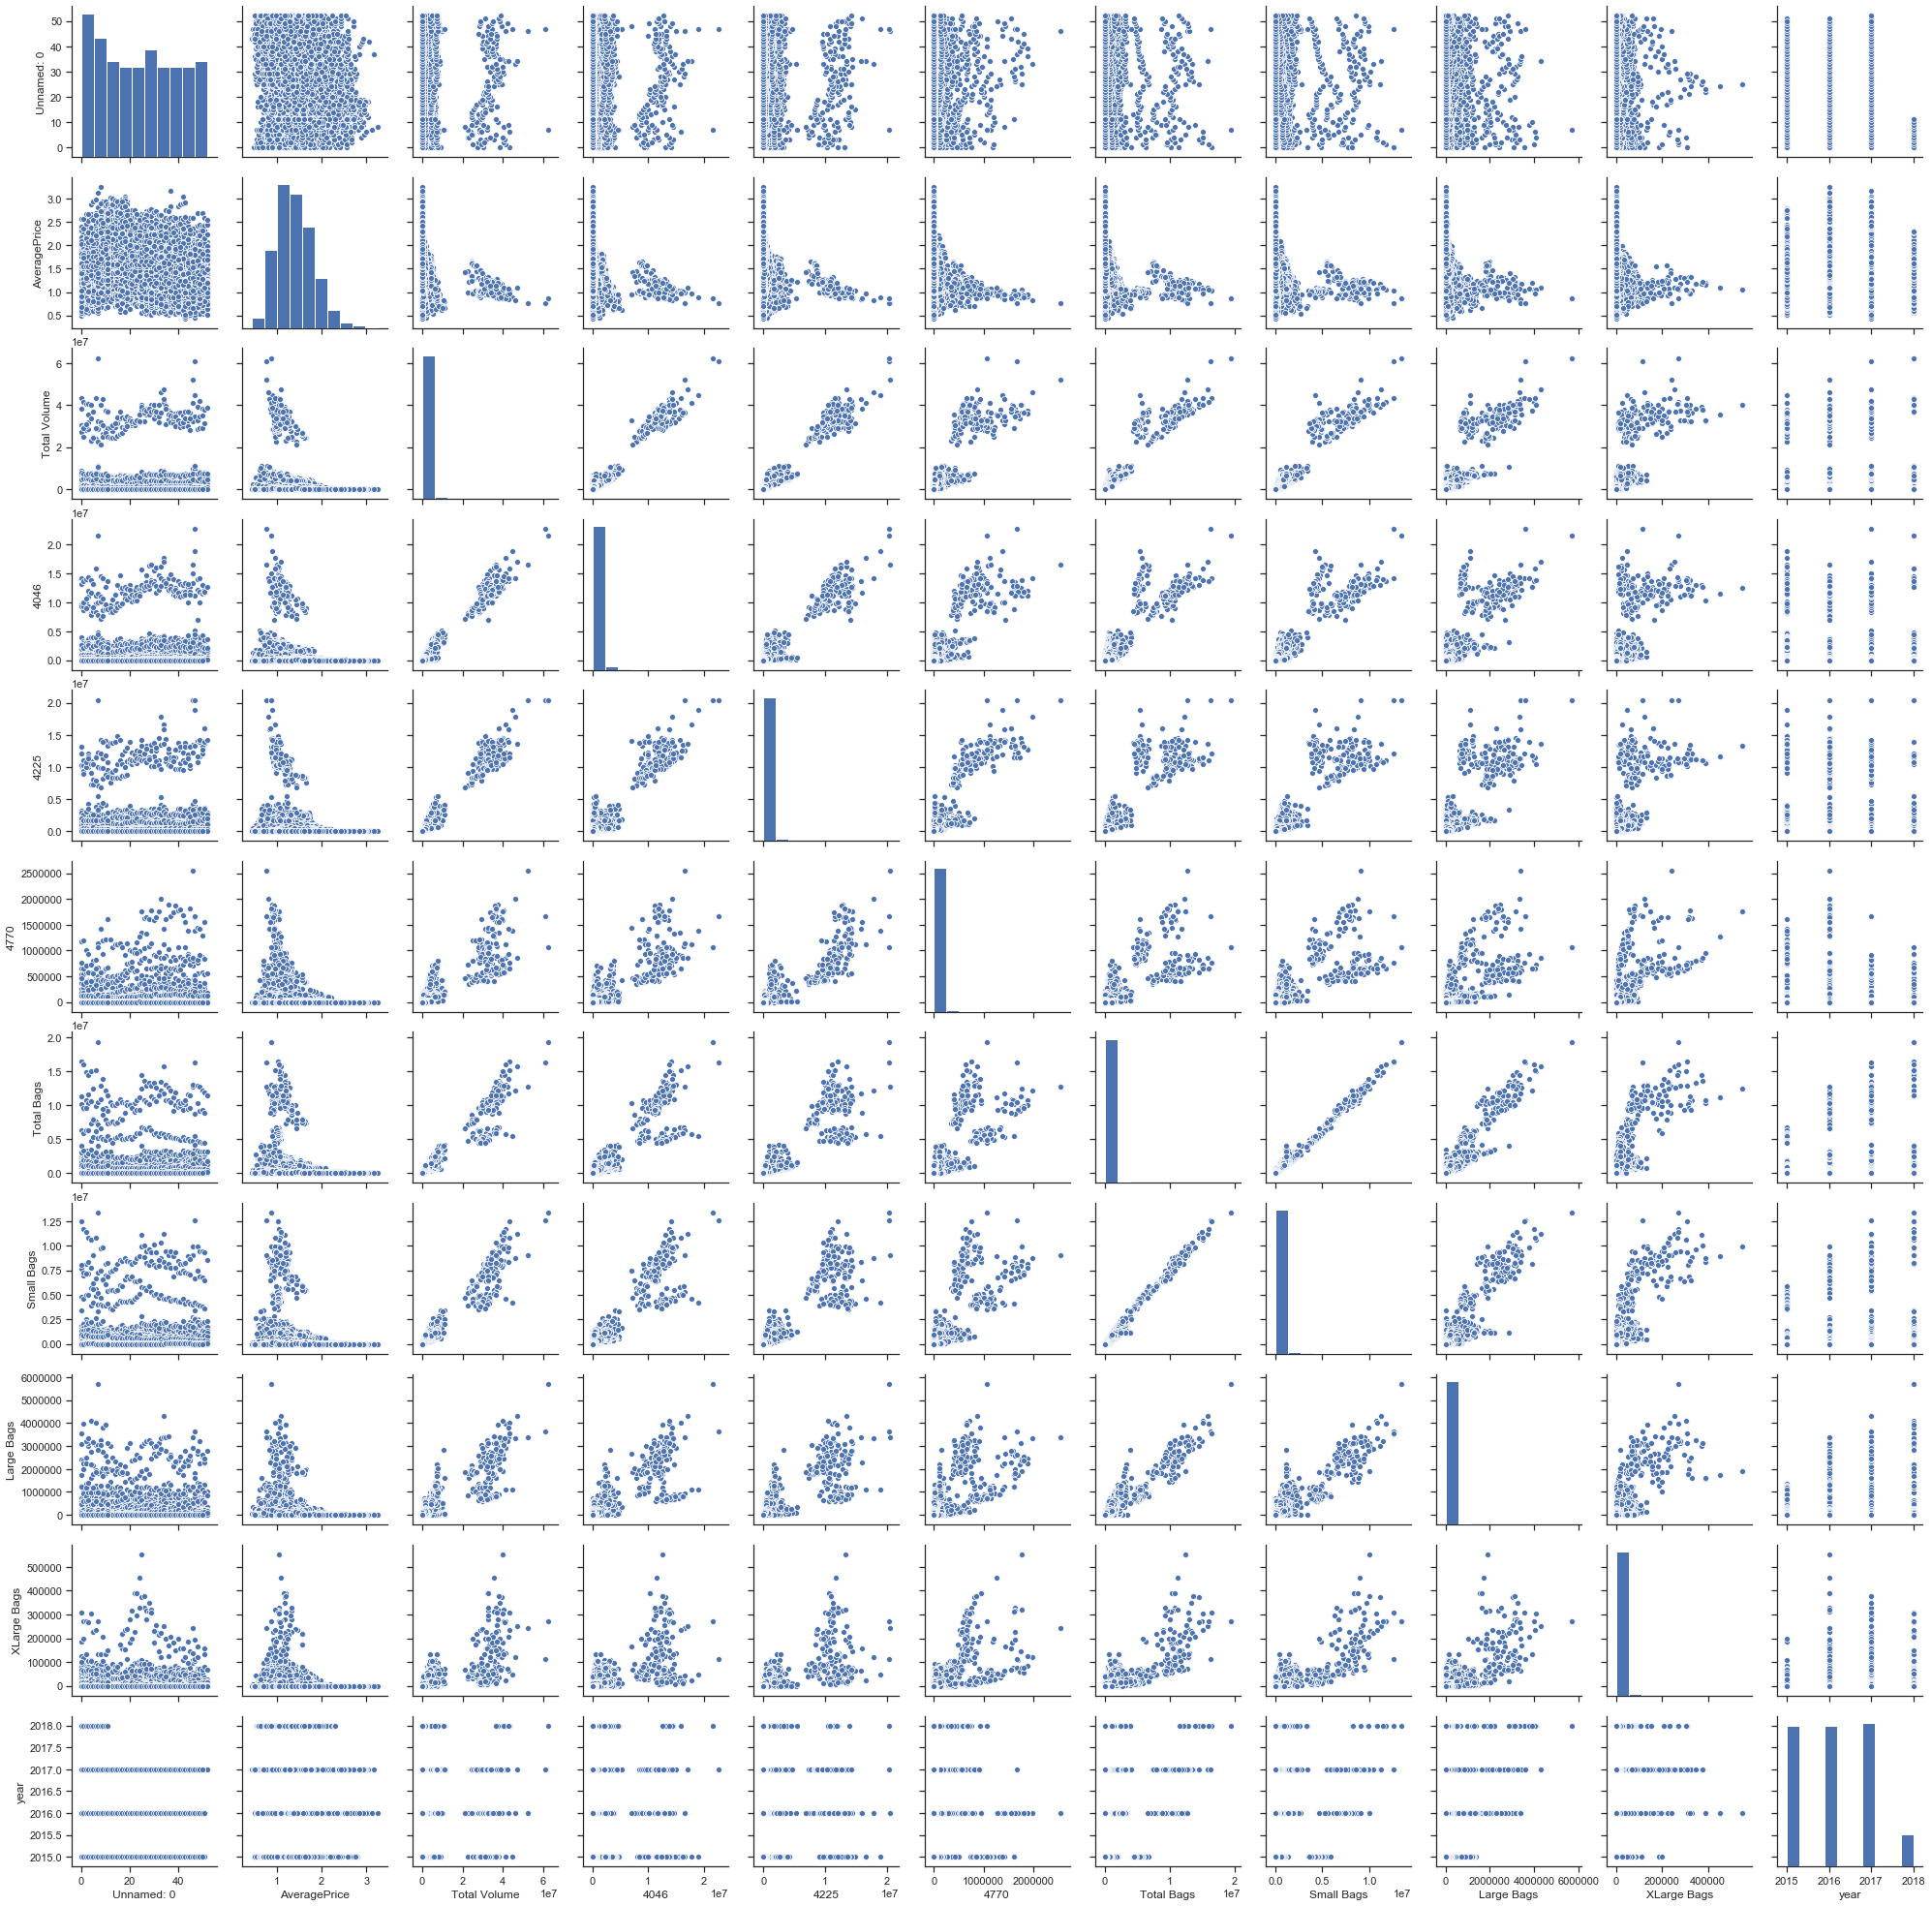

In [3]:
sns.pairplot(df)

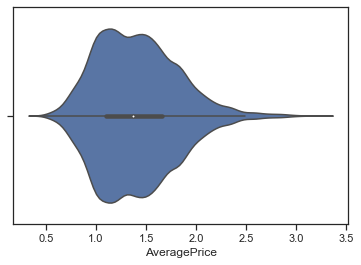

In [5]:
sns.violinplot(x=df['AveragePrice'])

In [6]:
df.corr(method='pearson')

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


In [7]:
df.corr(method='kendall')

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.084564,0.002938,0.014763,0.020745,0.026010,-0.024500,-0.028796,-0.017324,-0.041770,-0.113436
AveragePrice,-0.084564,1.000000,-0.425124,-0.416777,-0.343581,-0.374507,-0.414578,-0.368693,-0.356093,-0.320453,0.076467
Total Volume,0.002938,-0.425124,1.000000,0.726714,0.785215,0.639634,0.814217,0.761569,0.515899,0.515928,0.064858
4046,0.014763,-0.416777,0.726714,1.000000,0.592721,0.565499,0.633342,0.613367,0.457861,0.479197,0.007395
4225,0.020745,-0.343581,0.785215,0.592721,1.000000,0.632002,0.654727,0.626645,0.459772,0.488301,0.004643
4770,0.026010,-0.374507,0.639634,0.565499,0.632002,1.000000,0.588700,0.587754,0.412312,0.528474,-0.034336
Total Bags,-0.024500,-0.414578,0.814217,0.633342,0.654727,0.588700,1.000000,0.860226,0.567487,0.510146,0.158109
Small Bags,-0.028796,-0.368693,0.761569,0.613367,0.626645,0.587754,0.860226,1.000000,0.427452,0.501007,0.139435
Large Bags,-0.017324,-0.356093,0.515899,0.457861,0.459772,0.412312,0.567487,0.427452,1.000000,0.386015,0.146103
XLarge Bags,-0.041770,-0.320453,0.515928,0.479197,0.488301,0.528474,0.510146,0.501007,0.386015,1.000000,0.140693


In [8]:
df.corr(method='spearman')

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.127111,0.004181,0.021950,0.030354,0.037343,-0.036060,-0.042376,-0.025203,-0.056181,-0.149152
AveragePrice,-0.127111,1.000000,-0.612239,-0.596170,-0.513732,-0.532825,-0.596972,-0.536403,-0.511142,-0.427207,0.102275
Total Volume,0.004181,-0.612239,1.000000,0.902887,0.940025,0.828223,0.952550,0.925874,0.702067,0.659949,0.085144
4046,0.021950,-0.596170,0.902887,1.000000,0.793939,0.754838,0.837121,0.822036,0.638535,0.615535,0.009844
4225,0.030354,-0.513732,0.940025,0.793939,1.000000,0.819905,0.856946,0.833764,0.635465,0.628893,0.006217
4770,0.037343,-0.532825,0.828223,0.754838,0.819905,1.000000,0.779323,0.780185,0.571869,0.652807,-0.043871
Total Bags,-0.036060,-0.596972,0.952550,0.837121,0.856946,0.779323,1.000000,0.961018,0.753044,0.652582,0.207269
Small Bags,-0.042376,-0.536403,0.925874,0.822036,0.833764,0.780185,0.961018,1.000000,0.603582,0.641796,0.183499
Large Bags,-0.025203,-0.511142,0.702067,0.638535,0.635465,0.571869,0.753044,0.603582,1.000000,0.500590,0.191056
XLarge Bags,-0.056181,-0.427207,0.659949,0.615535,0.628893,0.652807,0.652582,0.641796,0.500590,1.000000,0.166582


#### Корреляции признаков

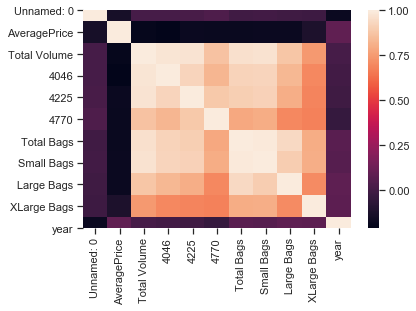

In [10]:
sns.heatmap(df.corr())

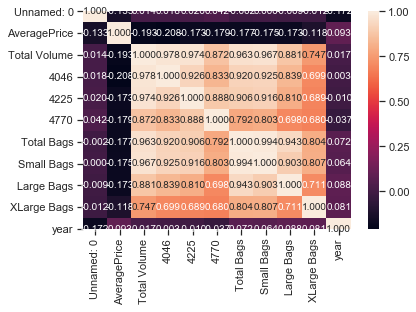

In [11]:
# Вывод значений в ячейках
sns.heatmap(df.corr(), annot=True, fmt='.3f')

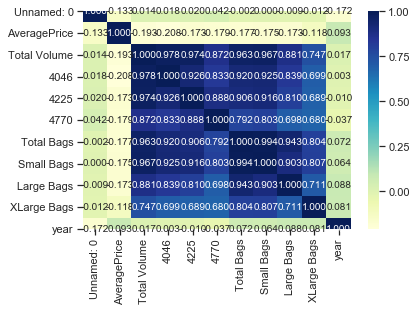

In [12]:
# Изменение цветовой гаммы
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

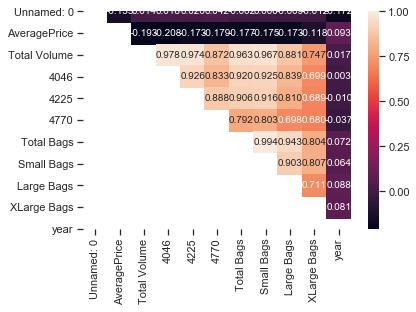

In [14]:
# Треугольный вариант матрицы
mask = np.zeros_like(df.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.3f')

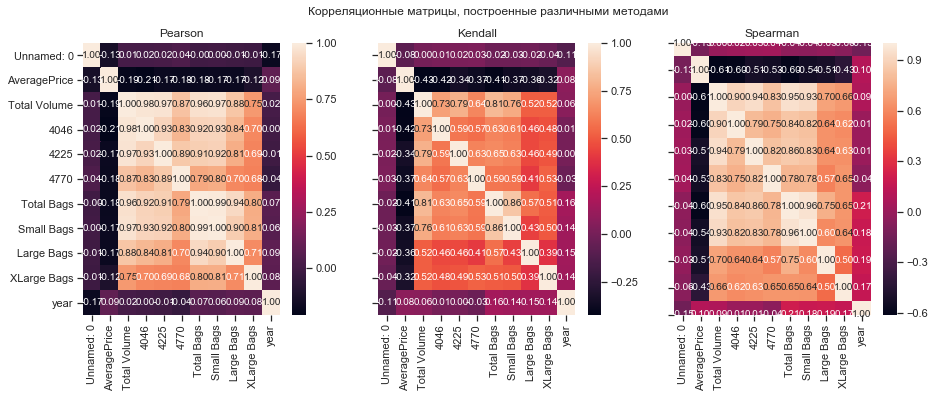

In [15]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(df.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(df.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(df.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')